In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from nFNC_functions import *
from Entrada_de_dados import *
from ELUi_functions import *

In [2]:
fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, M_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b = Entrada_de_dados()
m = 5
l_e = 20*h

In [3]:
Rompeu, e, f = Verificacao_DF(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, M_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e)
print(Rompeu, e, f)


False 0.16666666666666666 0.03151859892064612


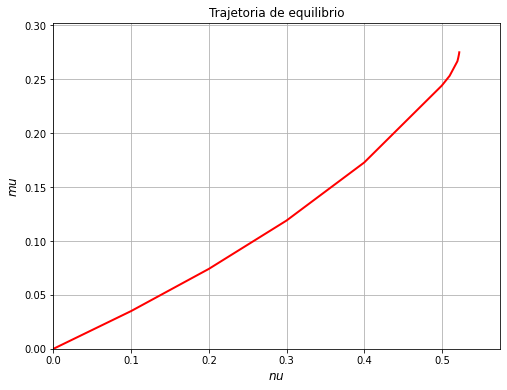

In [4]:
N_cr, M_cr = Curva_de_projeto_ELUi(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e, e)

In [5]:
print('N_cr: {:.4f} kN'.format(N_cr*1000))
print('M_cr: {:.2f} kNcm'.format(M_cr*100000))

N_cr: 634.3429 kN
M_cr: 16692.80 kNcm


In [6]:
i = 1
e = np.zeros(15)
N_cr = np.zeros(15)
M_cr = np.zeros(15)

while i <= 14:
    e[i] = i*h/10
    N_cr[i], M_cr[i] = Normal_critica(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e, e[i])
    i = i + 1

In [7]:
mu = np.zeros(15)
print('e(m) | mu')
for i in range(len(e)):
    if i != 0:
        mu[i] = N_cr[i]/(sigma_cd*b*h)
        formatted_string = '{:.1f}  | {:.5f}'.format(e[i]/h,mu[i])
        print(formatted_string)

e(m) | mu
0.1  | 0.87830
0.2  | 0.68270
0.3  | 0.55410
0.4  | 0.47120
0.5  | 0.40910
0.6  | 0.35450
0.7  | 0.30390
0.8  | 0.26350
0.9  | 0.23170
1.0  | 0.20630
1.1  | 0.18560
1.2  | 0.16860
1.3  | 0.15430
1.4  | 0.14220


# Verificação da estabilidade de um pilar

In [8]:
# Arbitra-se uma flecha tentativa inicial f = 0
f = 0
i=0
N = F/(b*h)
M = N*(e+f)
Rompeu, epsilon_0, k, epsilon_0_it, k_it, f_ad = Verificacao(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N, M, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b)
if Rompeu:
    print('Failure due to lack of resistant capacity')
    return False, e, f
while (True):
    N = N*np.ones(m)
    y = M = _r = np.zeros(m)

    for i in range(m):
        if (i == 0):
            y[i] = 0
            _r[i] = k/1000
            M[i] = N[i]*(e+f-y[i])
        elif (i == 1):
            y[i] = _r*dL**2/2
            M[i] = N[i]*(e+f-y[i])
            Rompeu, epsilon_0, k, epsilon_0_it, k_it, f_ad = Verificacao(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N[i], M[i], epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b)
            _r[i] = k/1000
        else:
            y[i] = _r[i-1]*dL**2+2*y[i-1]-y[i-2]
            M[i] = N[i]*(e+f-y[i])
            Rompeu, epsilon_0, k, epsilon_0_it, k_it, f_ad = Verificacao(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N[i], M[i], epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b)
            _r[i] = k/1000
        if Rompeu:
            print('Failure due to lack of resistant capacity')
            return True, e, f
    
    if abs(y[m] - f) <= h*tol_DF:
        print('ELUi ok!')
        return False, e, f
    else:
        f = y[m]
            
        


NameError: name 'F' is not defined